In [72]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def read_bin(filename,N):
	with open(filename, 'rb') as f:
		data = np.fromfile(f, dtype=np.int32)


	data = data.reshape((N, N))
	return data

def segment_time(t_0,t_max):
	bins= np.arange(0,t_max+1,t_0)
	segments = []
	for i in range(len(bins)):
		segments.append(bins[i:i+2])
	return segments[:-1]

def make_animation(data,time_region):
	fig = plt.figure()
	ax = fig.add_subplot(111)

	start=time_region[0]
	end=time_region[1]

	def updatefig(q):
		plt.clf()
		single=data[q]
		ax.clear()
		ax.set_xticks([])
		ax.set_yticks([])
		img=ax.imshow(single, interpolation='nearest', cmap=plt.cm.inferno)
		img.set_clim(0,4)
		plt.colorbar(img,ax=ax)
		ax.set_title('time='+str(q+start))



	ani = animation.FuncAnimation(fig, updatefig, frames=end-start,interval=3)
	ani.save('segmentos/animation_'+str(start)+"_"+str(end)+'.gif', fps=30)
	
def make_animation2(data,time_region,skip=1):

	fig, ax = plt.subplots()
	cax = ax.imshow(data[0], interpolation='nearest')
	cax.set_clim(0,4)
	fig.colorbar(cax)
	fig.set_dpi(200)
	start=time_region[0]
	end=time_region[1]

	plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

	def init():
		cax.set_data(data[0])
		ax.set_xticks([])
		ax.set_yticks([])
		return [cax]

	def update(i):
		cax.set_data(data[i])
		cax.set_cmap('inferno')
		cax.set_clim(0,4)
		ax.set_xticks([])
		ax.set_yticks([])
		return [cax]

	ani = animation.FuncAnimation(fig, update, frames=range(0, len(data), skip), init_func=init, blit=True,interval=3)
	ani.save('segmentos/animation_'+str(start)+"_"+str(end)+'.gif', fps=30)

	


In [49]:
#load csv files
config=np.genfromtxt('datos/config.csv', delimiter=',', skip_header=0)
N=int(config[0])
t_max=int(config[1])

data=[]

for i in range(t_max):
	data.append(
		read_bin('datos/datos'+str(i)+'.bin',N)
		)
	




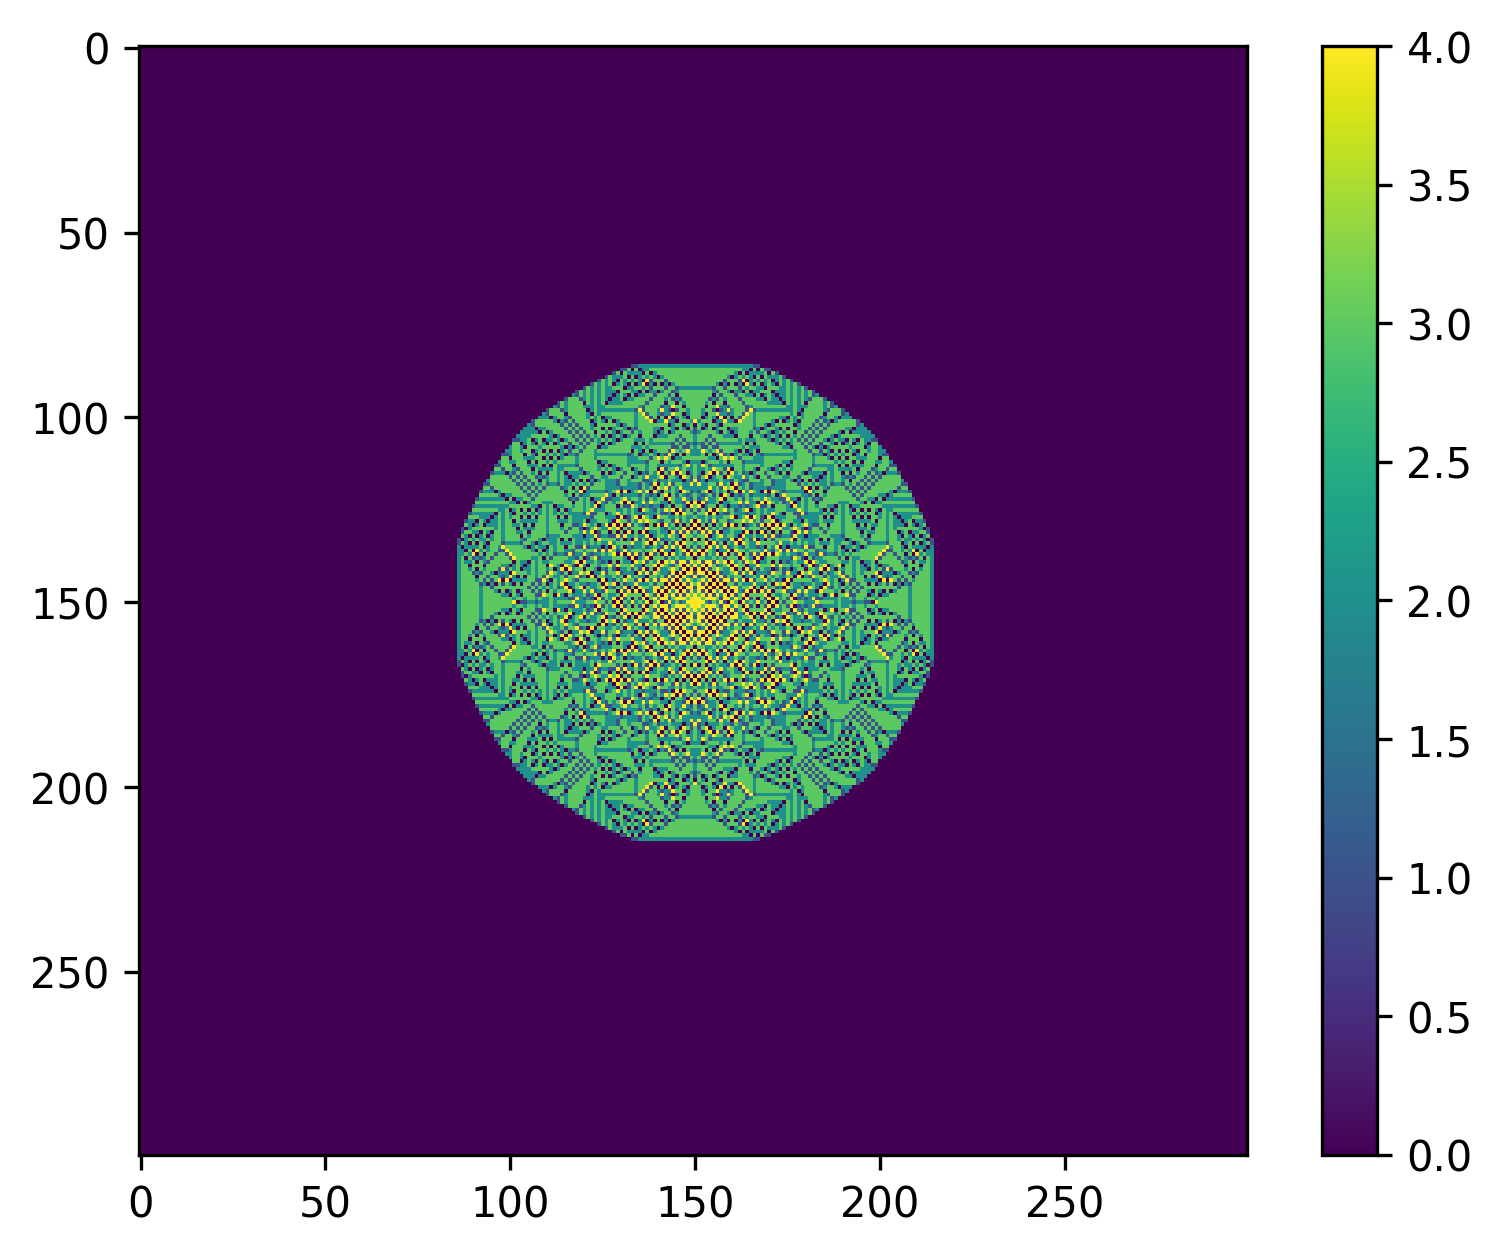

In [56]:

	

plt.figure(dpi=300)
plt.imshow(data[t_max-1])
plt.clim(0,4)
plt.colorbar()


KeyboardInterrupt: 

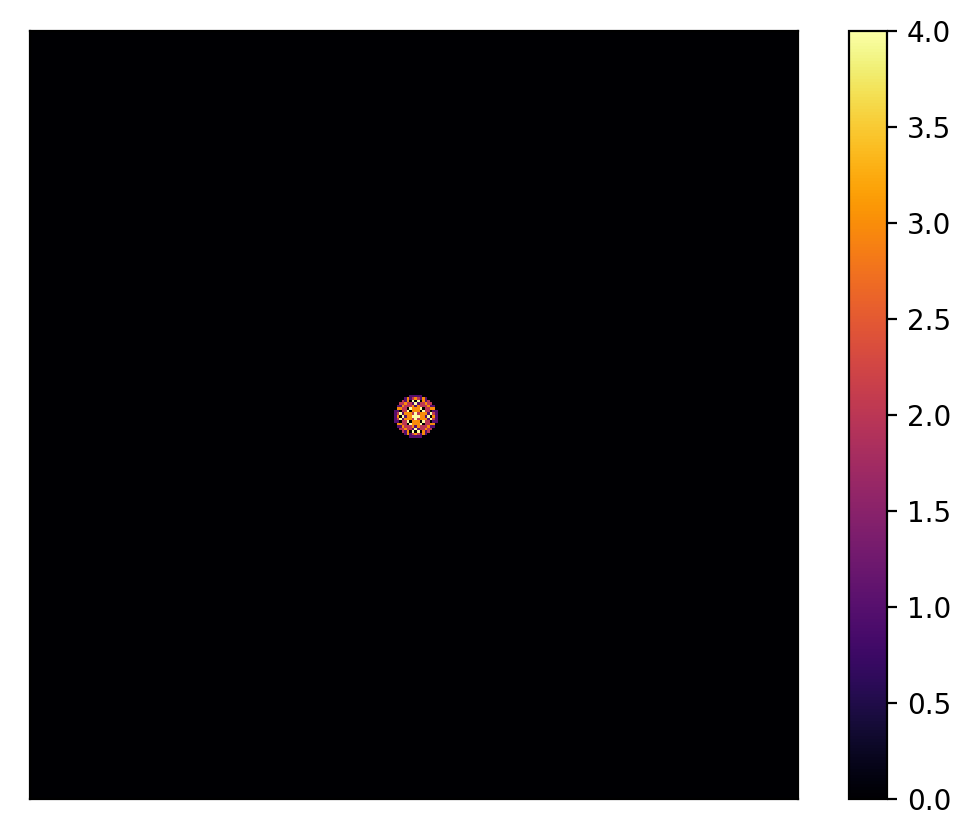

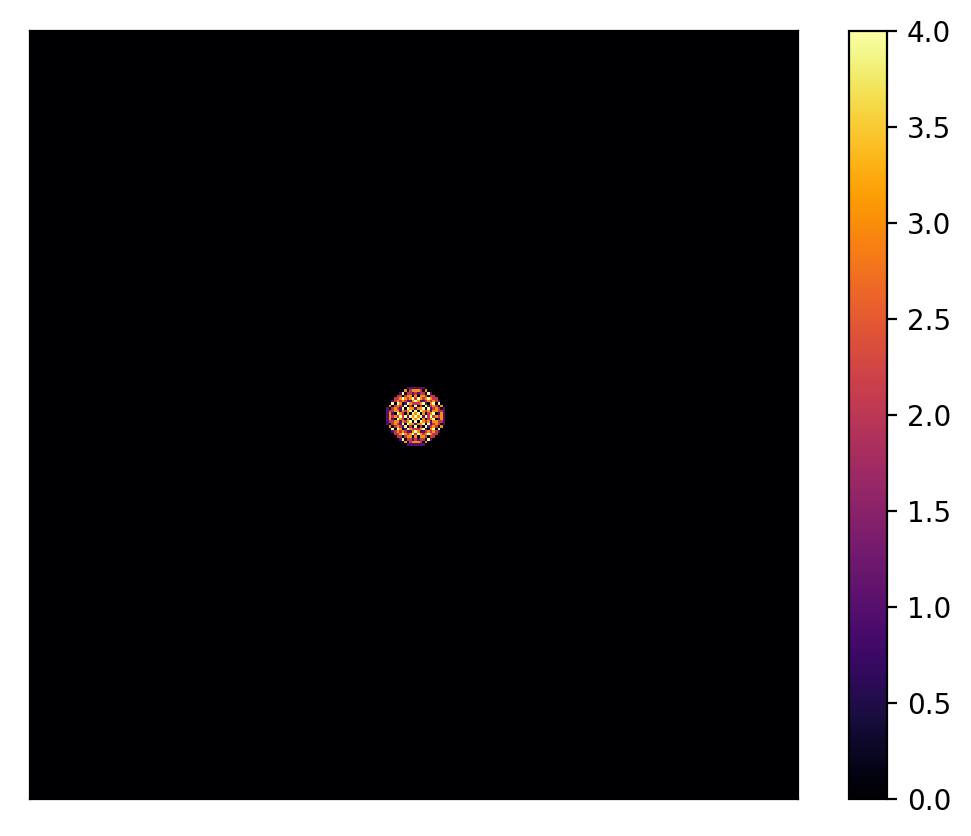

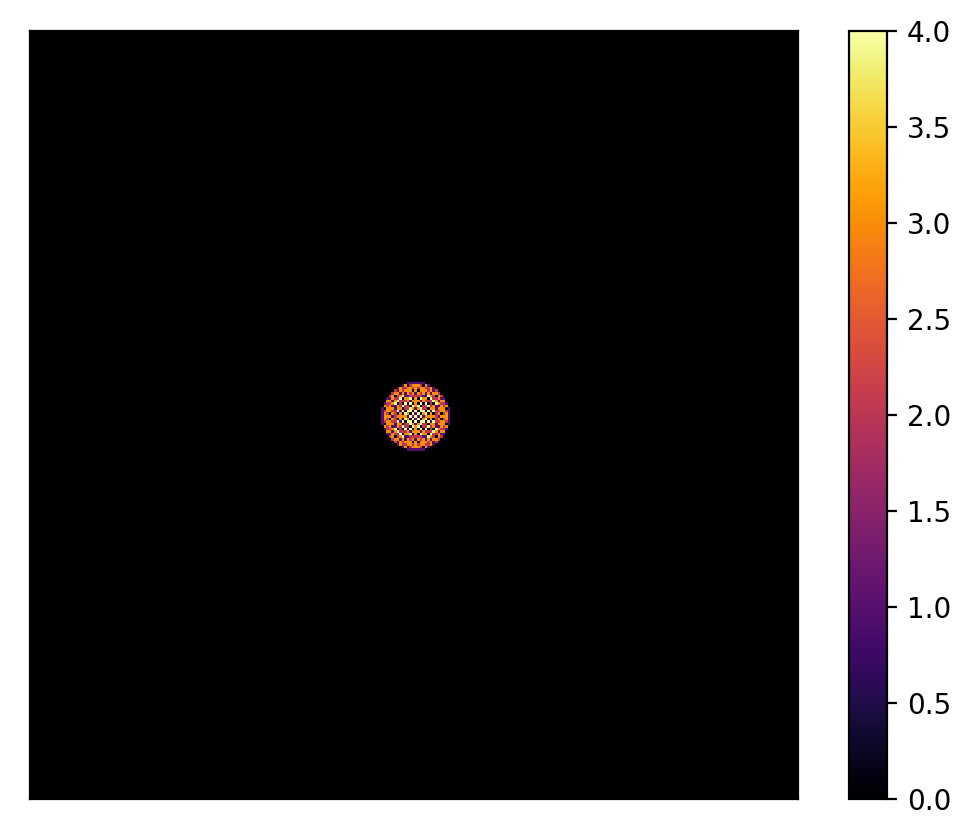

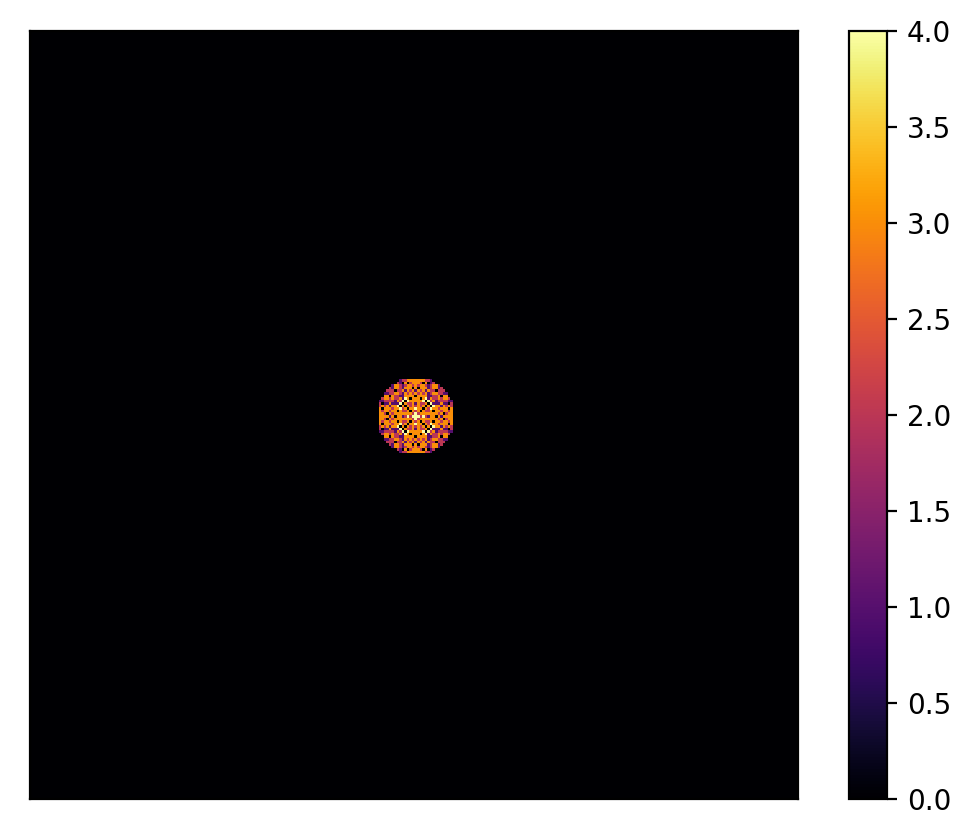

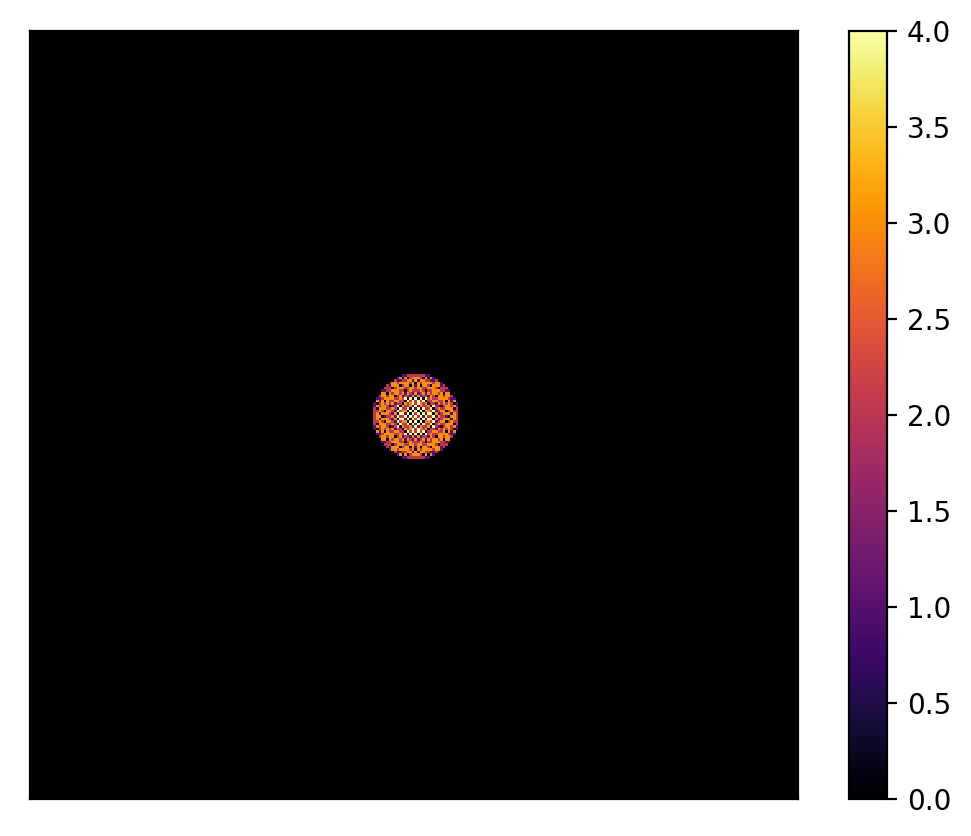

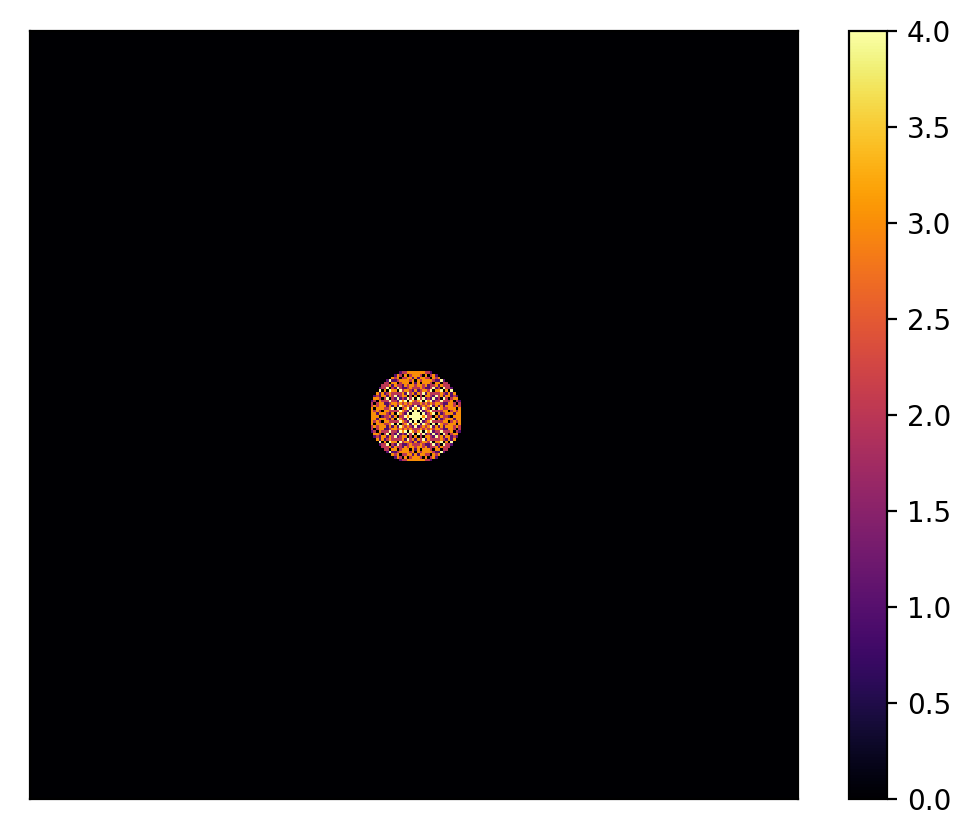

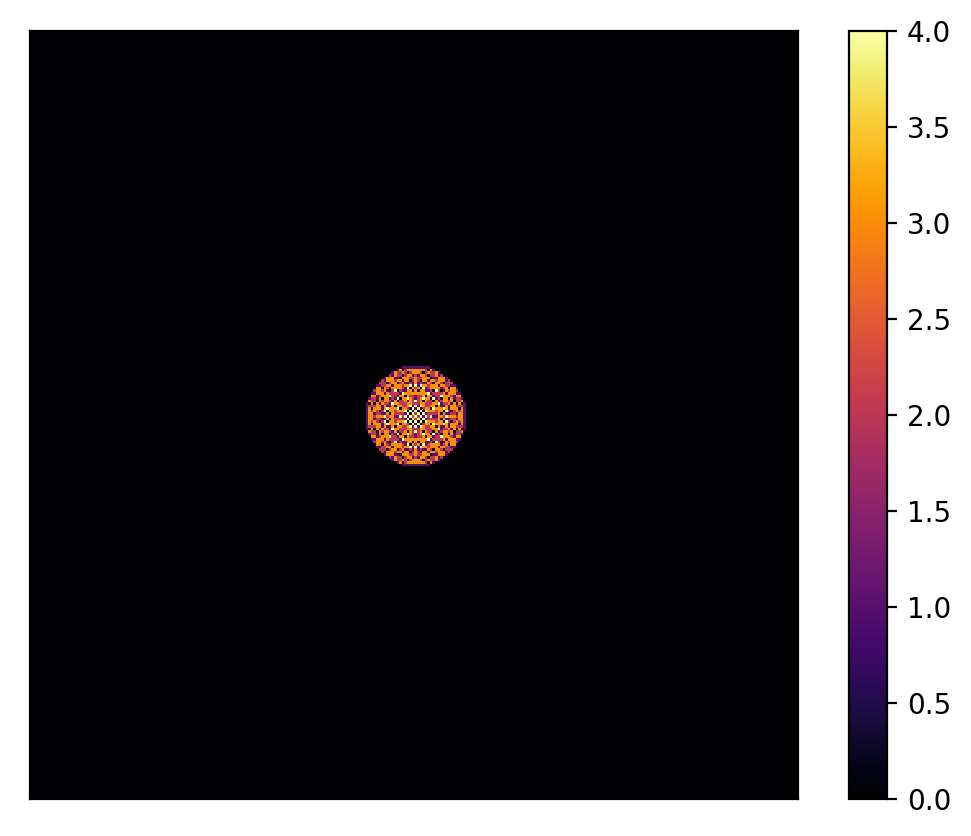

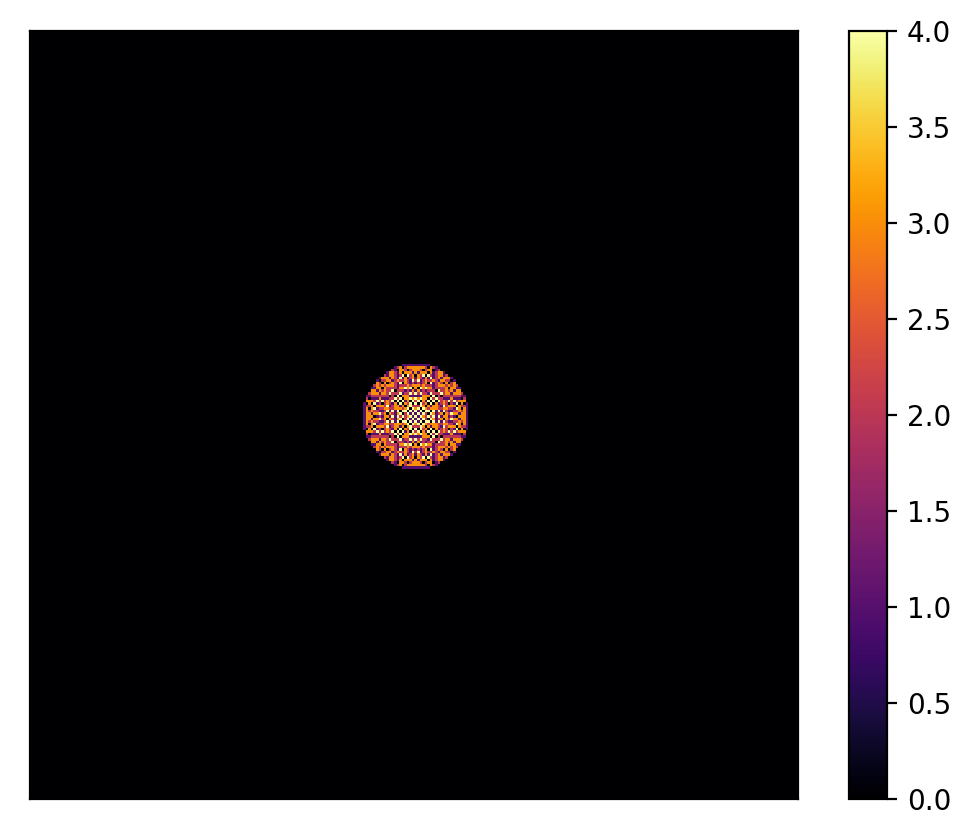

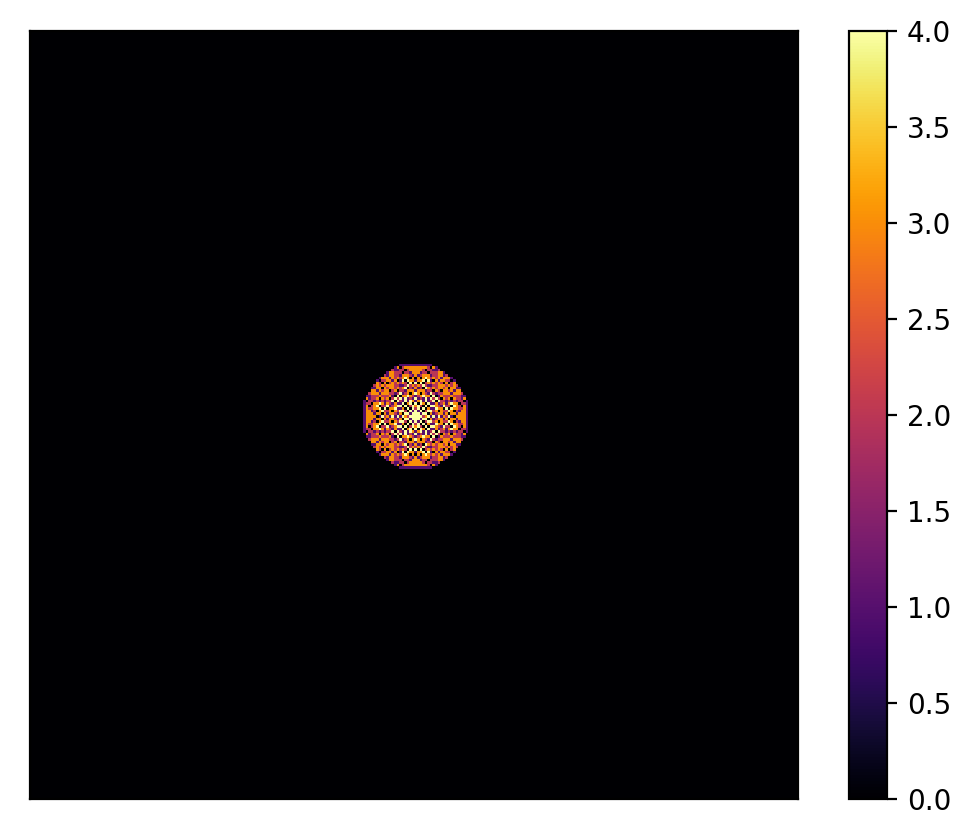

In [73]:
segments = segment_time(600,t_max)
data_segmented = []
for i in range(len(segments)):
	data_segmented.append(
		data[segments[i][0]:segments[i][1]]
		)

for i in range(len(data_segmented)):
	data_segment= data_segmented[i]
	time_region = segments[i]

	# print(time_region)

	make_animation2(data_segment,time_region,3)



	


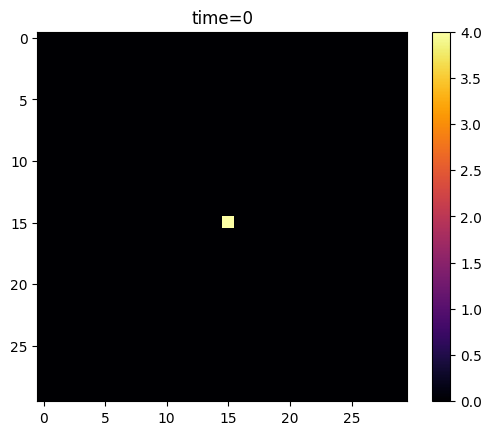

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

def updatefig(q):
	plt.clf()
	single=data[q]
	ax.clear()
	ax.set_xticks([])
	ax.set_yticks([])
	plt.imshow(single, interpolation='nearest', cmap=plt.cm.inferno)
	plt.clim(0,4)
	plt.colorbar()
	plt.title('time='+str(q))



ani = animation.FuncAnimation(fig, updatefig, frames=t_max)
ani.save('animation_'+str(t_max)+'.gif', fps=30)

In [ ]:
#gif to mp4
#ffmpeg -i animation.gif animation.mp4
import moviepy.editor as mp

In [ ]:
import moviepy.editor as mp
import os
import sys

f="animation_3000.gif"
clip = mp.VideoFileClip((f))
clip.write_videofile(os.path.splitext(f)[0]+'.mp4')
    

Moviepy - Building video animation_3000.mp4.
Moviepy - Writing video animation_3000.mp4



Moviepy - Done !
Moviepy - video ready animation_3000.mp4
